# Compléments sur les graphes
## DFS

In [8]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random

liste_gr1 = {
    "s": ["a", "b"],
    "a": ["s", "c"],
    "b": ["s", "c", "d"],
    "c": ["a", "b", "d", "e"],
    "d": ["b", "c", "e"],
    "e": ["c", "d"]
}

def creer_pile_vide():
    return []

def empiler(e, p):
    p.append(e)

def depiler(p):
    # sommet = p.pop(random.randint(0,len(p)-1))
    sommet = p.pop(-1)
    return sommet

def est_pile_vide(p):
    return len(p) == 0


def DFS_arbre(gr, s):
    # Explore le graphe en profondeur et renvoie un arbre couvrant
    p = creer_pile_vide()
    marques = []
    parent = {}
    empiler(s, p)

    while not est_pile_vide(p):
        v = depiler(p)
        if not v in marques:
            marques.append(v)
            for voisin in gr[v]:
                if not voisin in marques:
                    empiler(voisin, p)
                    parent[voisin] = v
    
    f = marques[-1]
    nouvelle = {}

    for u in marques:
        nouvelle[u] = []

    for (a, b) in parent.items():
        nouvelle[a].append(b)
        nouvelle[b].append(a)
    # while f != s:
    #     u = parent[f]
    #     nouvelle[u].append(f)
    #     nouvelle[f].append(u)
    #     f = u
    return nouvelle

## BFS
On commence d'abord par définir la structure de pile

In [9]:
def creer_file_vide():
    return []


def enfiler(e, f):
    f.append(e)


def defiler(f):
    e = f.pop(0)
    return e


def est_file_vide(f):
    return len(f) == 0

def BFS(G, s):
    F = creer_file_vide()
    marques = []
    parent = {}
    enfiler(s, F)

    while not est_file_vide(F):
        v = defiler(F)
        if not v in marques:
            marques.append(v)
            for voisin in G[v]:
                if not voisin in marques:
                    parent[voisin] = v
                    enfiler(voisin, F)

    return marques

def BFS_arbre(G, s):
    F = creer_file_vide()
    marques = []
    parent = {}
    enfiler(s, F)

    while not est_file_vide(F):
        v = defiler(F)
        if not v in marques:
            marques.append(v)
            for voisin in G[v]:
                if not voisin in marques:
                    parent[voisin] = v
                    enfiler(voisin, F)

    nouvelle = {}

    for u in marques:
        nouvelle[u] = []

    for (a, b) in parent.items():
        nouvelle[a].append(b)
        nouvelle[b].append(a)

    return nouvelle

# Génération de réseaux

In [10]:
def creer_reseau(n, p):

    noeuds = []
    arretes = []

    for i in range(n):
        for j in range(p):
            noeuds.append((i, j))

    for i in range(n):
        for j in range(p-1):
            arretes.append(((i, j), (i, j + 1)))

    for i in range(n - 1):
        for j in range(p):
            arretes.append(((i, j), (i + 1, j)))

    return (noeuds, arretes)

def conversion(reseau):
    (sommets, arretes) = reseau
    a = {}

    for s in sommets:
        chaine = str(s[0]) + "&" + str(s[1])
        a[chaine] = []

    for x in arretes:
        (u, v) = x
        (ux, uy) = u
        (vx, vy) = v
        nomu = str(ux) + "&" + str(uy)
        nomv = str(vx) + "&" + str(vy)

        a[nomu].append(nomv)
        a[nomv].append(nomu)

    for voisins in a.values():
         random.shuffle(voisins)


    return a

In [11]:
# def deconversion(liste, n, p):
#     """
#         Attend mon format très particulier qui utilise des esperluettes
#     """
#     noeuds = []
#     arretes = []
#
#     for i in range(n):
#         for j in range(p):
#             noeuds.append((i, j))
#
#     for i in range(n):
#         for j in range(p):
#             arretes.append(((i, j), (i, j + 1)))

# Génération de laby

In [12]:
def afficher_labyrinthe(arbre, n, p):
    lignes = np.zeros((2 * n - 1, 2 * p - 1), dtype = 'bool')

    for i in range(n):
        for j in range(p):
            lignes[2 * i][2 * j] = True
            identifiant_noeud = str(i) + "&" + str(j)

            for voisin in arbre[identifiant_noeud]:
                 coords = voisin.split("&")
                 if int(coords[0]) == i + 1:
                     lignes[2 * i + 1][2 * j] = True
                 elif int(coords[1]) == j + 1:
                     lignes[2 * i][2 * j + 1] = True

    plt.imshow(lignes, cmap='gray', interpolation='nearest')
    plt.show()

In [13]:
def creer(n, p):
    grille = conversion(creer_reseau(n, p))
    arbre_trouve = DFS_arbre(grille, '0&0')
    afficher_labyrinthe(arbre_trouve, n, p)

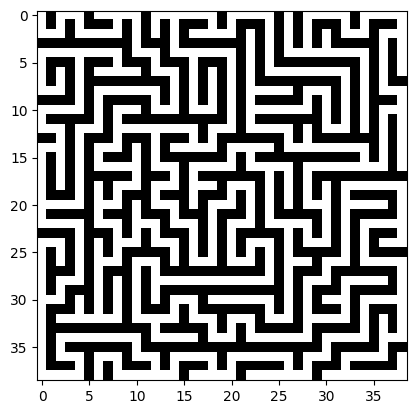

In [14]:
creer(20, 20)